# LIBS
- pip install scikit-learn
- pip install tensorflow (on python version 3.11)

In [24]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix, accuracy_score

## Treino | Teste

Text(0.5, 1.0, '8')

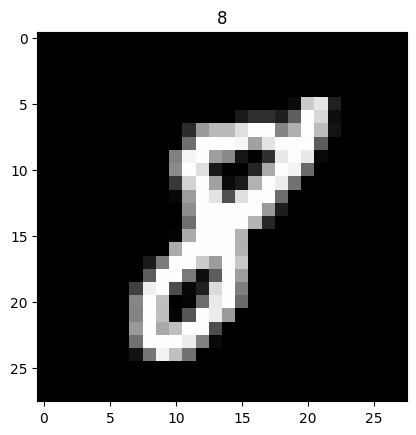

In [13]:
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

plt.imshow(x_treino[17], cmap='gray')
plt.title(y_treino[17])

## Redimensionando dados de matriz para vetor

In [14]:
x_treino = x_treino.reshape((len(x_treino), np.prod(x_treino.shape[1:])))
x_teste = x_teste.reshape((len(x_teste), np.prod(x_teste.shape[1:])))
x_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

### Convertendo para o tipo float (requerido para a normalização dos dados)

In [15]:
x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')
x_teste

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
x_treino /= 255
x_teste /= 255
x_teste

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Transformando classes para dummy

In [17]:
y_teste[0]

7

In [18]:
y_treino = to_categorical(y_treino, 10)
y_teste = to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Modelo
- Dropout(0.2) -> Reduz o super ajuste do modelo. 0.2 indica que 20% das associações geradas serão ZERADAS.
- retorno params -> Parametrosque a rede neural deve ajustar (pesos)


In [19]:
modelo = Sequential()

modelo.add(Dense(units=64, activation='relu', input_dim=784))
modelo.add(Dropout(0.2))

modelo.add(Dense(units=64, activation='relu'))
modelo.add(Dropout(0.2))

modelo.add(Dense(units=64, activation='relu', input_dim=784))
modelo.add(Dropout(0.2))

# camada de saida
modelo.add(Dense(units=10, activation='softmax'))

modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 10)               

# Compilação | Treinamento

In [20]:
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(
    x_treino,
    y_treino,
    epochs=20,
    validation_data=(x_teste, y_teste)
)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4507 - accuracy: 0.8603 - val_loss: 0.1681 - val_accuracy: 0.9497
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2253 - accuracy: 0.9352 - val_loss: 0.1410 - val_accuracy: 0.9590
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1914 - accuracy: 0.9455 - val_loss: 0.1116 - val_accuracy: 0.9658
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1641 - accuracy: 0.9522 - val_loss: 0.1088 - val_accuracy: 0.9675
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1519 - accuracy: 0.9554 - val_loss: 0.1079 - val_accuracy: 0.9674
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1407 - accuracy: 0.9589 - val_loss: 0.1066 - val_accuracy: 0.9697
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1298 - accuracy: 0.9617 - val_loss: 0.1008 - val_accuracy:

# Visualizações

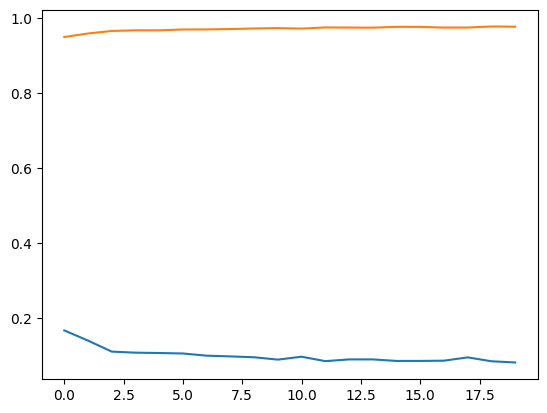

In [21]:
# erros e accuracy
historico.history.keys()

# evolução de erros (azul)
plt.plot(historico.history['val_loss'])

# performance
plt.plot(historico.history['val_accuracy'])

# Previsões | Confusão

In [22]:
previsoes = modelo.predict(x_teste)
previsoes

313/313 [==============================] - 0s 1ms/step


array([[1.0563696e-13, 4.0479676e-06, 7.1100665e-05, ..., 9.9980432e-01,
        1.3343733e-09, 1.2389173e-06],
       [2.8346284e-11, 2.0046725e-06, 9.9999666e-01, ..., 6.3737929e-07,
        4.7663757e-09, 1.3274870e-11],
       [3.1798311e-14, 9.9999774e-01, 1.1607921e-08, ..., 4.4000544e-07,
        1.4962275e-06, 2.1484372e-09],
       ...,
       [3.3345582e-10, 1.3560651e-09, 2.7200133e-07, ..., 5.0993808e-08,
        7.8402017e-08, 3.8175614e-05],
       [2.2806575e-13, 6.7167533e-13, 3.8256670e-13, ..., 5.0392631e-11,
        1.7704789e-07, 7.2212998e-08],
       [6.5677845e-13, 1.0479765e-20, 3.7201050e-14, ..., 6.0954911e-21,
        1.3556045e-14, 1.9869904e-18]], dtype=float32)

In [23]:
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 968,    0,    3,    1,    1,    0,    1,    1,    3,    2],
       [   0, 1120,    6,    0,    0,    1,    1,    1,    6,    0],
       [   2,    0, 1016,    1,    2,    0,    1,    6,    4,    0],
       [   0,    0,    6,  987,    0,    5,    0,    6,    4,    2],
       [   1,    0,    3,    0,  959,    0,    7,    0,    1,   11],
       [   2,    0,    0,   11,    1,  865,    4,    1,    5,    3],
       [   4,    2,    0,    1,    4,    4,  939,    0,    4,    0],
       [   0,    4,   15,    3,    0,    1,    0,  998,    0,    7],
       [   5,    0,    5,    6,    4,    4,    3,    4,  939,    4],
       [   4,    4,    0,    6,    6,    1,    1,    3,    4,  980]])

In [25]:
taxa_acerto = accuracy_score(y_teste_matriz, y_previsoes_matriz)
taxa_acerto

0.9771

## Previsão de 1 digito

In [26]:
# digito 4
y_treino[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [27]:
# digito 4
teste = x_treino[20]

# coerção para vetor
teste = np.expand_dims(teste, axis=0)

# previsao
pred = modelo.predict(teste)

# maior valor do "dummy" e resultado
pred = [np.argmax(pred) for t in pred]
pred

1/1 [==============================] - 0s 17ms/step


[4]